### Instituto Tecnológico de Costa Rica (ITCR)
### Escuela de Computación
### Curso: Inteligencia Artificial
 
### Tercera tarea programada 2023-I


Profesora: María Auxiliadora Mora

Medio de entrega: Por medio del TEC-Digital.

Entregables: Un archivo en Jupyter ( .IPYNB ). 

Modo de trabajo: Individual o en grupos de máximo dos personas.

- Jonathan Quesada Salas
- Rodolfo Cruz Vega

## Sección 2. Análisis de emociones con redes neuronales recurrentes LSTM utilizando Pytorch 

**1. Describa el problema y el objetivo del ejercicio**


El problema en este ejercicio es el análisis de emociones en textos de tweets. El objetivo es clasificar los textos de los tweets en diferentes categorías emocionales utilizando un modelo de aprendizaje automático. Se proporciona un conjunto de datos etiquetados con las emociones expresadas en cada tweet, y se busca construir un modelo que pueda predecir la emoción presente en nuevos textos de tweets.

El objetivo específico del ejercicio es clasificar los textos de los tweets utilizando cuatro de las clases con más registros. Estas clases pueden ser, por ejemplo, emociones como tristeza, entusiasmo, preocupación y neutralidad. La idea es entrenar un modelo utilizando los datos etiquetados y luego utilizarlo para predecir las emociones en nuevos tweets no etiquetados.

El análisis de emociones en texto tiene diversas aplicaciones, como el monitoreo de opiniones en redes sociales, la detección temprana de crisis emocionales, la personalización de experiencias de usuario y la investigación en ciencias sociales. Al abordar este problema, se busca comprender y clasificar las emociones expresadas en los textos de los tweets, lo que puede proporcionar información valiosa para diversas áreas de estudio y aplicaciones prácticas.

**2. Preprocese el conjunto de datos**

In [ ]:
import pandas as pd
# ======================================================
# Leer los datos de ejemplos
# ======================================================
reviews = pd.read_csv('tweet_emotions.csv')
# ======================================================
# Imprimir los datos del csv
# ======================================================
print(reviews.shape)
# ======================================================
# Imprimir de la tabla
# ======================================================
reviews.head()

(40000, 3)


,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [ ]:
# ======================================================
# Revisión de contenidos nulos y otros
# ======================================================
reviews['sentiment'] = reviews['sentiment'].fillna('')
reviews['content'] = reviews['content'].fillna('')
# ======================================================
# Se concatena los campos Title y Review Text.
# ======================================================
reviews['sentiment'] = reviews['sentiment'] 

In [ ]:
# ======================================================
# Seleccionar las columnas relevantes y calcular la longitud de las oraciones
# ======================================================
reviews['content_length'] = reviews['content'].apply(len)
relevant_columns = ['content', 'sentiment', 'content_length']
reviews = reviews[relevant_columns]
# ======================================================
# Imprimir la tabla
# ======================================================
reviews.head(20)

,content,sentiment,content_length
0,@tiffanylue i know i was listenin to bad habi...,empty,92
1,Layin n bed with a headache ughhhh...waitin o...,sadness,60
2,Funeral ceremony...gloomy friday...,sadness,35
3,wants to hang out with friends SOON!,enthusiasm,36
4,@dannycastillo We want to trade with someone w...,neutral,86
5,Re-pinging @ghostridah14: why didn't you go to...,worry,84
6,"I should be sleep, but im not! thinking about ...",sadness,132
7,Hmmm. http://www.djhero.com/ is down,worry,36
8,@charviray Charlene my love. I miss you,sadness,39
9,@kelcouch I'm sorry at least it's Friday?,sadness,42


In [ ]:
import pandas as pd
# ======================================================
# Verificar si existen registros con valores faltantes
# ======================================================
missing_values = reviews.isnull().sum()
print("Registros con valores faltantes:")
print(missing_values)
# ======================================================
# Eliminar registros con valores faltantes
# ======================================================
reviews = reviews.dropna()

# ======================================================
# Confirmar que los registros con valores faltantes han sido eliminados
# ======================================================
print("Registros con valores faltantes después de eliminarlos:")
print(reviews.isnull().sum())

import re
# ======================================================
# Eliminar caracteres especiales utilizando expresiones regulares
# ======================================================
reviews['content'] = reviews['content'].apply(lambda x: re.sub(r'[@#\\$%&\*\(\)\<\>\?\'\";:\[\]\{\}\|`\+=~]', '', x))

import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
# ======================================================
# Obtener las stopwords en inglés
# ======================================================
stop_words = set(stopwords.words('english'))
# ======================================================
# Eliminar las stopwords
# ======================================================
reviews['content'] = reviews['content'].apply(lambda x: ' '.join(word for word in x.split() if word.lower() not in stop_words))

reviews['content'] = reviews['content'].str.lower()
# ======================================================
# Se imprime la tabla con los cambios
# ======================================================
print("==========================================")
print("TABLA CON EL PREPROCESAMIENTO DE LOS DATOS")
print("==========================================")
reviews.head(20)


Registros con valores faltantes:
content           0
sentiment         0
content_length    0
dtype: int64
Registros con valores faltantes después de eliminarlos:
content           0
sentiment         0
content_length    0
dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


TABLA CON EL PREPROCESAMIENTO DE LOS DATOS


,content,sentiment,content_length
0,tiffanylue know listenin bad habit earlier sta...,empty,92
1,layin n bed headache ughhhh...waitin call...,sadness,60
2,funeral ceremony...gloomy friday...,sadness,35
3,wants hang friends soon!,enthusiasm,36
4,dannycastillo want trade someone houston ticke...,neutral,86
5,re-pinging ghostridah14 didnt go prom bc bf di...,worry,84
6,"sleep, im not! thinking old friend want. hes m...",sadness,132
7,hmmm. http//www.djhero.com/,worry,36
8,charviray charlene love. miss,sadness,39
9,kelcouch im sorry least friday,sadness,42


**3. Explore y visualice algunas estadísticas con gráficos de barras o pastel. Por ejemplo, cuente cuántos registros hay en cada clase y haga un histograma con el largo de los tweets**

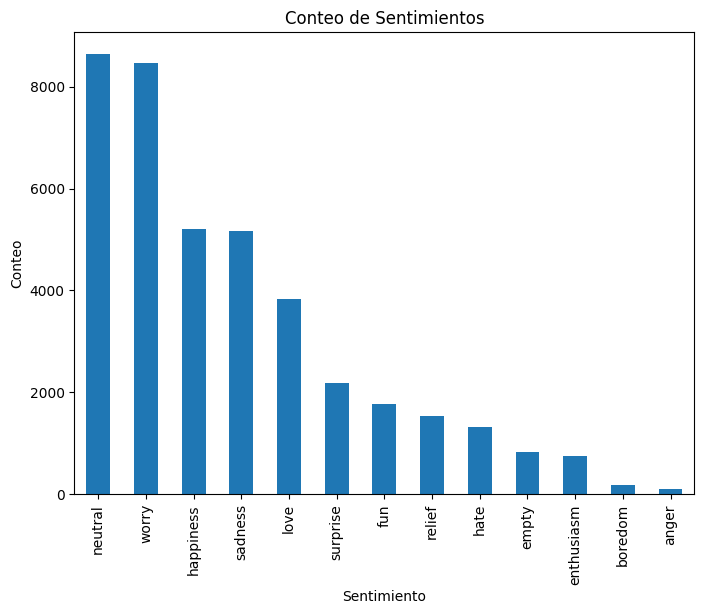

In [ ]:
import matplotlib.pyplot as plt
# ======================================================
# Obtener el conteo de cada sentimiento
# ======================================================
sentiment_counts = reviews['sentiment'].value_counts()
# ======================================================
# Crear el gráfico de barras
# ======================================================
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentimiento')
plt.ylabel('Conteo')
plt.title('Conteo de Sentimientos')
plt.show()

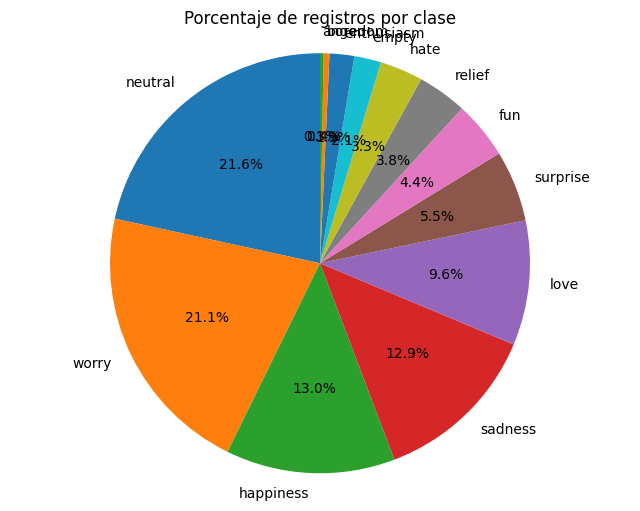

In [ ]:
# ======================================================
# Conteo de registros por clase emocional
# ======================================================
class_counts = reviews['sentiment'].value_counts()
# ======================================================
# Gráfico de pastel
# ======================================================
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de registros por clase')
plt.axis('equal')
plt.show()

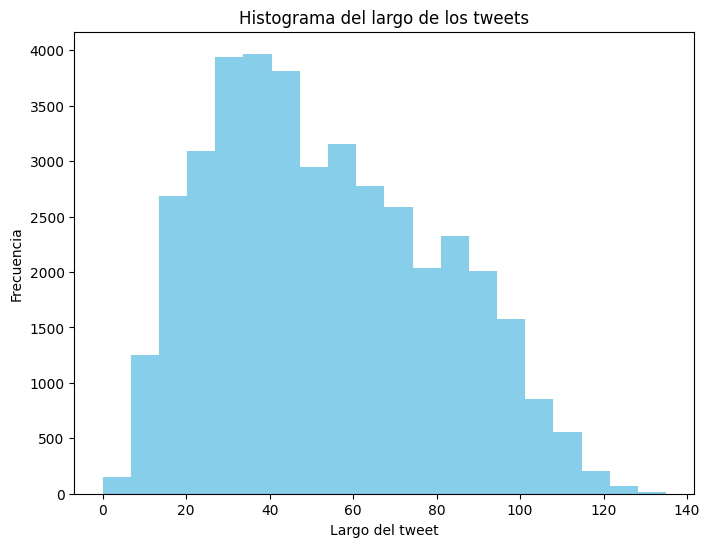

In [ ]:
# ======================================================
# Calcular la longitud de cada tweet
# ======================================================
reviews['tweet_length'] = reviews['content'].apply(lambda x: len(x))
# ======================================================
# Histograma del largo de los tweets
# ======================================================
plt.figure(figsize=(8, 6))
plt.hist(reviews['tweet_length'], bins=20, color='skyblue')
plt.title('Histograma del largo de los tweets')
plt.xlabel('Largo del tweet')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
# ======================================================
# Eliminar registros con review vacío y rating igual a cero
# ======================================================
print("Cantidad de registros antes de la limpieza", reviews.shape)
reviews = reviews[(reviews['sentiment'].str.strip() != '') & (reviews['content'].str.strip() != '')]
print("Cantidad de registros después de la limpieza", reviews.shape)

Cantidad de registros antes de la limpieza (40000, 4)
Cantidad de registros después de la limpieza (39994, 4)


In [ ]:
# ======================================================
#Cambio sentimient a numeracion
# ======================================================
zero_numbering = dict(zip(reviews['sentiment'].unique(), range(len(reviews['sentiment'].unique()))))
reviews['sentiment'] = reviews['sentiment'].apply(lambda x: zero_numbering[x])

<ipython-input-9-ac1696d8a83b>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviews['sentiment'] = reviews['sentiment'].apply(lambda x: zero_numbering[x])


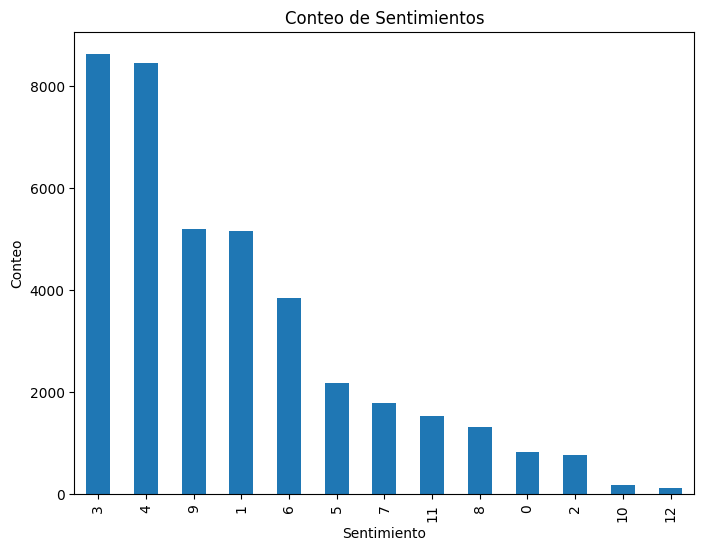

In [ ]:
import matplotlib.pyplot as plt
# ======================================================
# Obtener el conteo de cada sentimiento
# ======================================================
sentiment_counts = reviews['sentiment'].value_counts()
# ======================================================
# Crear el gráfico de barras
# ======================================================
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar')
plt.xlabel('Sentimiento')
plt.ylabel('Conteo')
plt.title('Conteo de Sentimientos')
plt.show()

In [ ]:
# ======================================================
# Estadísticas
# ======================================================
pd.set_option('display.float_format', lambda x: '%.2f' % x)
reviews.describe()

,sentiment,content_length,tweet_length
count,39994.00,39994.00,39994.00
mean,4.76,73.41,53.24
std,2.84,36.55,26.62
min,0.00,1.00,1.00
25%,3.00,43.00,32.00
50%,4.00,69.00,50.00
75%,7.00,103.00,74.00
max,12.00,167.00,135.00


In [ ]:
reviews.head(20)

,content,sentiment,content_length,tweet_length
0,tiffanylue know listenin bad habit earlier sta...,0,92,63
1,layin n bed headache ughhhh...waitin call...,1,60,44
2,funeral ceremony...gloomy friday...,1,35,35
3,wants hang friends soon!,2,36,24
4,dannycastillo want trade someone houston ticke...,3,86,59
5,re-pinging ghostridah14 didnt go prom bc bf di...,4,84,62
6,"sleep, im not! thinking old friend want. hes m...",1,132,88
7,hmmm. http//www.djhero.com/,4,36,27
8,charviray charlene love. miss,1,39,29
9,kelcouch im sorry least friday,1,42,30


**4. Seleccione un subconjunto de los registros que corresponda a las cuatro clases con más datos.**

3    8635
4    8458
9    5208
1    5164
Name: sentiment, dtype: int64


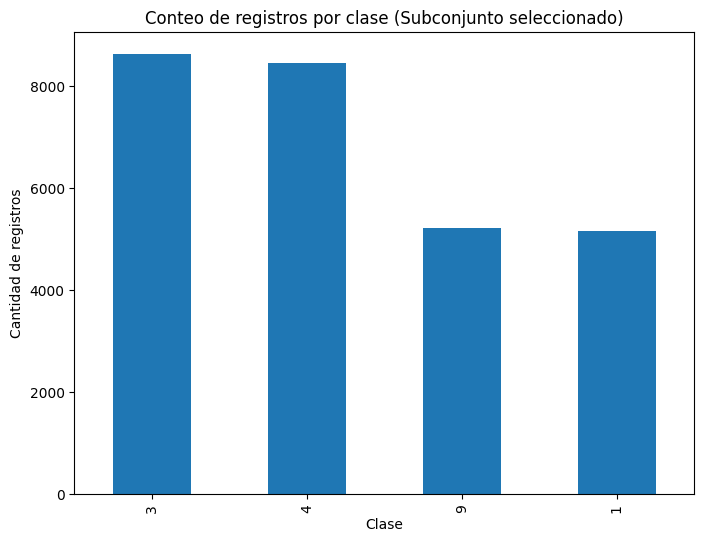

In [ ]:
# ======================================================
# Calcular el conteo de registros por clase
# ======================================================
class_counts = reviews['sentiment'].value_counts()
# ======================================================
# Seleccionar las cuatro clases con más datos
# ======================================================
top_classes = class_counts.head(4).index.tolist()
# ======================================================
# Filtrar el DataFrame original para obtener el subconjunto de registros correspondientes a las cuatro clases con más datos
# ======================================================
subset_df = reviews[reviews['sentiment'].isin(top_classes)].copy()
# ======================================================
# Verificar el resultado
# ======================================================
print(subset_df['sentiment'].value_counts())
# ======================================================
# Gráfico de barras para el conteo de registros por clase en el subconjunto seleccionado
# ======================================================
plt.figure(figsize=(8, 6))
subset_df['sentiment'].value_counts().plot(kind='bar')
plt.title('Conteo de registros por clase (Subconjunto seleccionado)')
plt.xlabel('Clase')
plt.ylabel('Cantidad de registros')
plt.show()


## Funcionalidades varias antes de entrar al entrenamiento

In [ ]:
pip install spacy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# ======================================================
# Bibliotecas requeridas
# ======================================================
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import re
import spacy
from collections import Counter
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F
import string
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [ ]:
# ======================================================
# Tokenización: proceso de separar un fragmento de texto en 
#  unidades más pequeñas llamadas tokens. 
#  Los tokens pueden ser palabras, caracteres o sub-palabras.
# Crea un pipeline vacío para un tipo de idioma. 
# ======================================================
tok = spacy.blank("en")
# ======================================================
# Función: tokenize
# Parametros: 
#       text: Es el texto que se pueda tener en el tweet
# ======================================================
def tokenize (text):
  # ======================================================
    # remueve caracteres especiales
    # ======================================================
    text = re.sub(r"[^\x00-\x7F]+", " ", text) 
    # ======================================================
    # remueve signos de puntuación y números
    # ======================================================
    regex = re.compile('[' + re.escape(string.punctuation) + '0-9\\r\\t\\n]') 
    nopunct = regex.sub(" ", text.lower())
    return [token.text for token in tok.tokenizer(nopunct)]

In [ ]:
# ======================================================
# Se cuenta la cantidad de ocurrencias de cada token 
# en el corpus.
# ======================================================
counts = Counter()
for index, row in reviews.iterrows():
    counts.update(tokenize(row['content']))
print(counts)    

Counter({' ': 37820, '  ': 11227, 'i': 6021, 'nt': 5948, '   ': 5834, 'm': 4769, 'day': 3200, 'good': 2301, '    ': 2220, 'get': 2017, 's': 1983, 'like': 1937, 'do': 1914, 'got': 1864, 'http': 1837, 'go': 1820, 'today': 1644, 'love': 1642, 'work': 1637, 'going': 1573, 'ca': 1537, 'you': 1523, 'happy': 1481, 'lol': 1443, 'one': 1391, 'u': 1390, 'time': 1382, 'know': 1351, 'com': 1346, 'back': 1346, 'really': 1278, 'see': 1181, 'that': 1153, 'well': 1119, 'mothers': 1114, 'it': 1096, 'night': 1095, 'new': 1079, 'home': 1070, 'think': 1044, 'thanks': 1023, 'want': 1014, 'oh': 1006, 'amp': 997, 'still': 980, 'much': 955, 'miss': 911, 'great': 878, 'last': 874, 'need': 856, 'morning': 853, 'hope': 843, '     ': 817, 'would': 812, 'haha': 805, 'ill': 804, 'twitter': 798, 'me': 787, 'feel': 779, 've': 778, 'fun': 773, 'could': 753, 'did': 731, 'sad': 728, 'wish': 721, 'tomorrow': 712, 're': 706, 'sorry': 694, 'now': 689, 'tonight': 682, 'bad': 671, 'right': 661, 'make': 637, 'na': 636, 'nice'

In [ ]:
# ======================================================
# Se eliminan los tokens que no ocurren con mucha frecuencia (menos de dos veces). 
# ======================================================
print("num_words before:",len(counts.keys()))
for word in list(counts):
    if counts[word] < 2:
        del counts[word]
print("num_words after:",len(counts.keys()))
print(counts)

num_words before: 46881
num_words after: 14974
Counter({' ': 37820, '  ': 11227, 'i': 6021, 'nt': 5948, '   ': 5834, 'm': 4769, 'day': 3200, 'good': 2301, '    ': 2220, 'get': 2017, 's': 1983, 'like': 1937, 'do': 1914, 'got': 1864, 'http': 1837, 'go': 1820, 'today': 1644, 'love': 1642, 'work': 1637, 'going': 1573, 'ca': 1537, 'you': 1523, 'happy': 1481, 'lol': 1443, 'one': 1391, 'u': 1390, 'time': 1382, 'know': 1351, 'com': 1346, 'back': 1346, 'really': 1278, 'see': 1181, 'that': 1153, 'well': 1119, 'mothers': 1114, 'it': 1096, 'night': 1095, 'new': 1079, 'home': 1070, 'think': 1044, 'thanks': 1023, 'want': 1014, 'oh': 1006, 'amp': 997, 'still': 980, 'much': 955, 'miss': 911, 'great': 878, 'last': 874, 'need': 856, 'morning': 853, 'hope': 843, '     ': 817, 'would': 812, 'haha': 805, 'ill': 804, 'twitter': 798, 'me': 787, 'feel': 779, 've': 778, 'fun': 773, 'could': 753, 'did': 731, 'sad': 728, 'wish': 721, 'tomorrow': 712, 're': 706, 'sorry': 694, 'now': 689, 'tonight': 682, 'bad': 67

In [ ]:
# ======================================================
# Se crea el vocabulario
# ======================================================
vocab2index = {"":0, "UNK":1}
words = ["", "UNK"]
for word in counts:
    # ======================================================
    # Se asigna un identificador a cada palabra
    # ======================================================
    vocab2index[word] = len(words)
    words.append(word)

print(vocab2index)    

{'': 0, 'UNK': 1, 'know': 2, 'listenin': 3, 'bad': 4, 'habit': 5, 'earlier': 6, 'started': 7, 'freakin': 8, 'part': 9, 'layin': 10, 'n': 11, 'bed': 12, 'headache': 13, 'ughhhh': 14, '  ': 15, 'waitin': 16, 'call': 17, 'funeral': 18, 'ceremony': 19, 'gloomy': 20, 'friday': 21, 'wants': 22, 'hang': 23, 'friends': 24, 'soon': 25, 'want': 26, 'trade': 27, 'someone': 28, 'houston': 29, 'tickets': 30, ' ': 31, 'one': 32, 'will': 33, 're': 34, 'pinging': 35, 'did': 36, 'nt': 37, 'go': 38, 'prom': 39, 'bc': 40, 'bf': 41, 'like': 42, 'sleep': 43, 'i': 44, 'm': 45, 'not': 46, 'thinking': 47, 'old': 48, 'friend': 49, 'he': 50, 's': 51, 'married': 52, 'now': 53, 'damn': 54, 'amp': 55, '   ': 56, 'scandalous': 57, 'hmmm': 58, 'http': 59, 'www': 60, 'com': 61, 'love': 62, 'miss': 63, 'sorry': 64, 'least': 65, 'ca': 66, 'fall': 67, 'asleep': 68, 'choked': 69, 'retainers': 70, 'ugh': 71, 'beat': 72, 'stupid': 73, 'song': 74, 'get': 75, 'next': 76, 'rude': 77, 'brodyjenner': 78, 'u': 79, 'watch': 80, '

In [ ]:
def encode_sentence(text, vocab2index, N=70):
    """
    Codificación de una oración antes de ser utilizada por el modelo. 
    Parámetros:
       text: el texto a procesar
       vocab2index: diccionario con el vocabulario a utilizar. 
       N: largo máximo
    """
    tokenized = tokenize(text)
    encoded = np.zeros(N, dtype=int)
    # ======================================================
    # El get en diccionario permite definir un valor si un item no existe ("UNK").  
    # ======================================================
    enc1 = np.array([vocab2index.get(word, vocab2index["UNK"]) for word in tokenized])
    # ======================================================
    # Largo máximo del resultado.
    # ======================================================
    length = min(N, len(enc1))
    encoded[:length] = enc1[:length]
    return encoded, length

# ======================================================
# Se crea la lista de encoded para realizar el análisis
# ======================================================
reviews['encoded'] = reviews['content'].apply(lambda x: np.array(encode_sentence(x,vocab2index ), dtype=object))
# ======================================================
# Se retorna la tabla
# ======================================================
reviews.head()

,content,sentiment,content_length,tweet_length,encoded
0,tiffanylue know listenin bad habit earlier sta...,0,92,63,"[[1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0,..."
1,layin n bed headache ughhhh...waitin call...,1,60,44,"[[10, 11, 12, 13, 14, 15, 16, 17, 15, 0, 0, 0,..."
2,funeral ceremony...gloomy friday...,1,35,35,"[[18, 19, 15, 20, 21, 15, 0, 0, 0, 0, 0, 0, 0,..."
3,wants hang friends soon!,2,36,24,"[[22, 23, 24, 25, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0..."
4,dannycastillo want trade someone houston ticke...,3,86,59,"[[1, 26, 27, 28, 29, 30, 31, 32, 33, 0, 0, 0, ..."


In [ ]:
# ======================================================
# Verificación de qué tan bien balanceadas están las clases.
# ======================================================
Counter(reviews['sentiment'])

Counter({0: 827,
         1: 5164,
         2: 759,
         3: 8635,
         4: 8458,
         5: 2187,
         6: 3842,
         7: 1776,
         8: 1323,
         9: 5208,
         10: 179,
         11: 1526,
         12: 110})

In [ ]:
# ======================================================
# Datos de entrenamiento y pruebas.
# ======================================================
X = list(reviews['encoded'])
y = list(reviews['sentiment'])

print(X[0])
print(y[0])
# ======================================================
# División de datos de entrenamiento y validación
# ======================================================
from sklearn.model_selection import train_test_split
# ======================================================
# Se establece los datos de entrenamiento
# ======================================================
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

[array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
 9]
0


In [ ]:
# ======================================================
# Definción de la clase Dataset para manejo de los datos
# ======================================================
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [ ]:
# ======================================================
# Creación de los datasets de entrenamiento y validación
# ======================================================
train_ds = ReviewsDataset(X_train, y_train)
valid_ds = ReviewsDataset(X_valid, y_valid)

In [ ]:
# ======================================================
# Se imprimen los valores de train_ds y valid_ds
# ======================================================
print(len(train_ds))
print(len(valid_ds))

31995
7999


**5. Utilizando PyTorch defina una red recurrente LSTM para procesar el conjunto de datos y clasificar los comentarios de usuario.**

In [ ]:
class LSTM_fixed_len(torch.nn.Module) :
    """
    Clase para realizar la clasificación de las oraciones. 
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, tagset_size=13) :
        """
        Inicialización de la clase.
        Parámetros:
           embedding_dim: dimesionalidad del vector de palabras. 
           hidden_dim: dimensión de la capa oculta de la red. 
           vocab_size: tamaño del vocabulario.  
           tagset_size: número de clases.
        """
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, tagset_size)
        
        # Durante el entrenamiento, pone a cero aleatoriamente algunos de los elementos 
        # del tensor de entrada con probabilidad p utilizando muestras de una 
        # distribución de Bernoulli. Esta ha demostrado ser una técnica eficaz para la regularización.
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x, l):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

## Etapas combinadas

**6. Defina los hiper-parámetros del proceso de entrenamiento, por ejemplo, función de perdida, el optimizador, entre otros.**

**7. Separe las muestras en datos de entrenamiento y evaluación y entrene el modelo.**

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    """
    Entrenamiento del modelo utilizando PyTorch.
    Parámetros:
       model: una instancia del modelo. 
       epochs: número de épocas de entrenamiento. 
       lr: factor de aprendizaje
    """
    # ======================================================
    # Selección del optimizador
    # ======================================================
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    # ======================================================
    # Para todas las épocas
    # ======================================================
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            
            # ======================================================
            # se realiza la predicción.
            # ======================================================
            y_pred = model(x, l)
            optimizer.zero_grad()
            # ======================================================
            # se calcula la pérdida
            # ======================================================
            loss = F.cross_entropy(y_pred, y)
            # ======================================================
            # cálculo del gradiente
            # ======================================================
            loss.backward()
            # ======================================================
            # actualización de los parámetros
            # ======================================================
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc, val_rmse = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (sum_loss/total, val_loss, val_acc, val_rmse))

def validation_metrics(model, valid_dl):
    """
    Validación del modelo utilizando PyTorch.
    Parámetros:
       model: una instancia del modelo. 
       valid_dl: DataLoader con acceso a datos de validación.
    """    
    # ======================================================
    # Se establecen las variables locales
    # ======================================================    
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    # ======================================================
    # Se crea un ciclo para recorrer otas las metricas de validación
    # ======================================================
    for x, y, l in valid_dl:
        x = x.long()
        y = y.long()
        # ======================================================
        # Se establece el model para y_hat
        # ======================================================
        y_hat = model(x, l)
        # ======================================================
        # Para calcular la perdida
        # ======================================================
        loss = F.cross_entropy(y_hat, y)
        # ======================================================
        # Se establece el maximo para realizar las predicciones
        # ======================================================
        pred = torch.max(y_hat, 1)[1]
        correct += (pred == y).float().sum()
        total += y.shape[0]
        # ======================================================
        # Se suman las perdidas
        # ======================================================
        sum_loss += loss.item()*y.shape[0]
        # ======================================================
        # Para calcular el error cuadratico medio
        # ======================================================
        sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
    return sum_loss/total, correct/total, sum_rmse/total

In [ ]:
batch_size = 5000
vocab_size = len(words)
# ======================================================
# DataLoader para el conjunto de entrenamiento y validación
# ======================================================
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(valid_ds, batch_size=batch_size)
# ======================================================
#(vocab_size, embedding_dim, hidden_dim, tagset_size=13)
# Creación del modelo LSTM
# ======================================================
model_fixed = LSTM_fixed_len(vocab_size, 50, 50)
# ======================================================
# Entrenamiento del modelo
# ======================================================
train_model(model_fixed, epochs=30, lr=0.01)

train loss 2.169, val loss 2.165, val accuracy 0.209, and val rmse 2.941
train loss 2.146, val loss 2.146, val accuracy 0.218, and val rmse 3.344
train loss 2.145, val loss 2.145, val accuracy 0.218, and val rmse 3.344
train loss 2.145, val loss 2.145, val accuracy 0.218, and val rmse 3.344
train loss 2.145, val loss 2.145, val accuracy 0.218, and val rmse 3.344
train loss 2.145, val loss 2.145, val accuracy 0.218, and val rmse 3.344


In [ ]:
# ======================================================
# Validación del modelo
# ====================================================== 
average_loss, accuracy, average_rmse = validation_metrics (model_fixed, val_dl)

print ("Exactitud", accuracy)
print("Raíz del error cuadrático medio", average_rmse)

Exactitud tensor(0.2090)
Raíz del error cuadrático medio 2.9405414844907605


**8. Grafique la curva de error, explique los resultados obtenidos y ajuste el modelo o el proceso de entrenamiento apropiadamente.**

In [ ]:
import matplotlib.pyplot as plt
# ======================================================
# Función: train_model
# Parametros:
#   model: es el modelo que se va entrenar para calcular la grafica de error
#   epochs: son las epocas para entrenar el modelo
#   lr: es el indice de aprendizaje
# ======================================================
def train_model(model, epochs=10, lr=0.001):
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    
    train_losses = []  # Store training loss values
    # ======================================================
    # Para entrenar el modelo para imprimir la grafica
    # ======================================================
    for i in range(epochs):
        # ======================================================
        # Definición de variables
        # ======================================================
        model.train()
        sum_loss = 0.0
        total = 0
        # ======================================================
        # Ciclo para calcular la perdida y optimizar el resultado de la grafica
        # ======================================================
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            y_pred = model(x, l)
            # ======================================================
            # Optimizar la gradiente resultante            
            # ======================================================
            optimizer.zero_grad()
            loss = F.cross_entropy(y_pred, y)
            loss.backward()
            # ======================================================
            # Optimizar los pasos
            # ======================================================
            optimizer.step()
            # ======================================================
            # Sumas las perdidas
            # ======================================================
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        # ======================================================
        # Calcular la perdida de entrenamiento
        # ======================================================
        train_loss = sum_loss / total
        train_losses.append(train_loss)
        # ======================================================
        # Se ejecuta la validación de las metricas necesarias
        # ======================================================
        val_loss, val_acc, val_rmse = validation_metrics(model, val_dl)
        
        if i % 5 == 1:
            print("Epoch %d: train loss %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (i, train_loss, val_loss, val_acc, val_rmse))
    # ======================================================
    # Graficar la curva de error
    # ======================================================
    plt.plot(range(epochs), train_losses, label='Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Error Curve')
    plt.legend()
    plt.show()


Epoch 1: train loss 2.158, val loss 2.147, val accuracy 0.218, and val rmse 2.980
Epoch 6: train loss 2.143, val loss 2.135, val accuracy 0.229, and val rmse 3.110
Epoch 11: train loss 2.142, val loss 2.133, val accuracy 0.231, and val rmse 3.080
Epoch 16: train loss 2.138, val loss 2.133, val accuracy 0.222, and val rmse 3.278
Epoch 21: train loss 2.137, val loss 2.135, val accuracy 0.228, and val rmse 3.087
Epoch 26: train loss 2.132, val loss 2.132, val accuracy 0.232, and val rmse 3.300


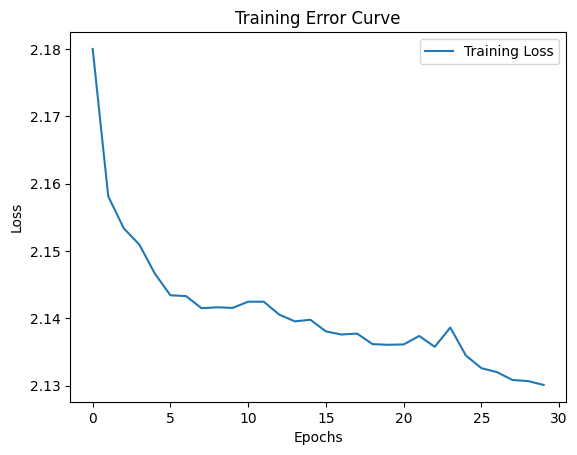

In [ ]:
# ======================================================
# Se ejecuta la función
# ======================================================
train_model(model_fixed, epochs=30, lr=0.01)

**9. Evalúe el modelo resultante utilizando una matriz de confusión y métricas extraídas a partir de esta (ie. exactitud, precisión, exhaustividad y F1). Despliegue de forma gráfica la matriz de confusión para el cálculo de las métricas y explique los resultados obtenidos.**

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# ======================================================
# Función validation_metrics
# Parametros: 
#   model: Modelo que se esta usando bajo la estructura anterior
#   valid_dl: Es la validacion del modelo
# ======================================================
def validation_metrics(model, valid_dl):
    model.eval()
    predictions = []
    true_labels = []
    # ======================================================
    # Ciclo para realizar las predicciones y construir las filas
    # ======================================================
    with torch.no_grad():
        for x, y, l in valid_dl:
            x = x.long()
            y = y.long()
            y_hat = model(x, l)
            # ======================================================
            # Se establece la predicción maxima
            # ======================================================
            pred = torch.max(y_hat, 1)[1]
            # ======================================================
            # Se almacenan las predicciones
            # ======================================================
            predictions.extend(pred.tolist())
            true_labels.extend(y.tolist())
    # ======================================================
    # Se establece la matriz de confusion
    # ======================================================
    cm = confusion_matrix(true_labels, predictions)
    # ======================================================
    # Se despliega la grafica de confusion
    # ======================================================
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()
    # ======================================================
    # Se imprime la clasificación de los sentimientos
    # ======================================================
    target_names = ['anger', 'boredom', 'empty', 'enthusiasm', 'fun', 'happiness',
                    'hate', 'love', 'neutral', 'relief', 'sadness', 'surprise', 'worry']
    # ======================================================
    # Se establece el reporte que se mostrará en la tabla
    # ======================================================
    report = classification_report(true_labels, predictions, target_names=target_names, zero_division=1)

    print("Classification Report:")
    print(report)
    # ======================================================
    # Se establecen las metricas necesarias
    # ======================================================
    accuracy = accuracy_score(true_labels, predictions)
    precision = precision_score(true_labels, predictions, average='weighted', zero_division=1)
    recall = recall_score(true_labels, predictions, average='weighted', zero_division=1)
    f1 = f1_score(true_labels, predictions, average='weighted', zero_division=1)
    # ======================================================
    # Se imprimen las metricas
    # ======================================================
    print("================================================")
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1-score:", f1)
    print("================================================")

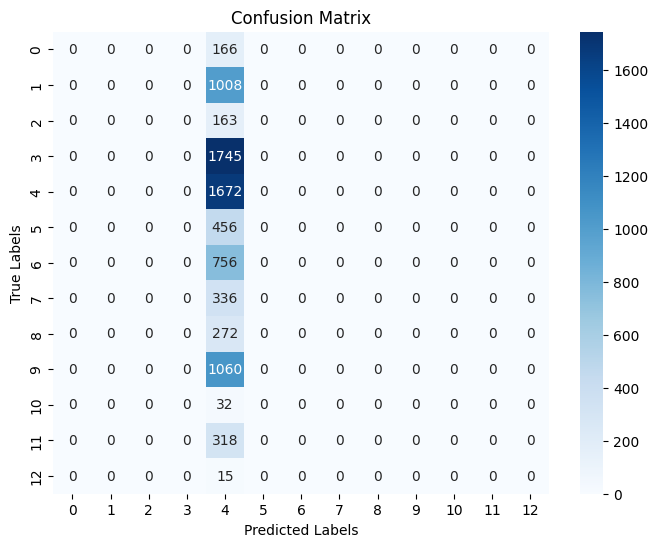

Classification Report:
              precision    recall  f1-score   support

       anger       1.00      0.00      0.00       166
     boredom       1.00      0.00      0.00      1008
       empty       1.00      0.00      0.00       163
  enthusiasm       1.00      0.00      0.00      1745
         fun       0.21      1.00      0.35      1672
   happiness       1.00      0.00      0.00       456
        hate       1.00      0.00      0.00       756
        love       1.00      0.00      0.00       336
     neutral       1.00      0.00      0.00       272
      relief       1.00      0.00      0.00      1060
     sadness       1.00      0.00      0.00        32
    surprise       1.00      0.00      0.00       318
       worry       1.00      0.00      0.00        15

    accuracy                           0.21      7999
   macro avg       0.94      0.08      0.03      7999
weighted avg       0.83      0.21      0.07      7999

Accuracy: 0.20902612826603326
Precision: 0.8346657940318

In [ ]:
validation_metrics(model_fixed, val_dl)

**10. Analice los resultados, proponga mejoras y explique los cambios realizados al flujo de trabajo del proyecto para mejorar el rendimiento de la red (aplique al menos dos cambios que efectivamente mejoren el rendimiento).**

**¿Por qué es necesario cambiar los valores de las variables batch_size, embedding_dim, hidden_dim y lr?**

Es necesario cambiar los valores de las variables batch_size, embedding_dim, hidden_dim y lr con el fin de explorar diferentes configuraciones y encontrar los valores óptimos que maximicen el rendimiento del modelo en el problema específico. Aquí se expliaca la importancia de cambiar cada una de estas variables

Principalmente se realizaron los siguientes cambios para poder notar una mejora en el exactitud del modelo, las cuales son las siguientes:

1. Se cambio el valor de "batch_size" que tenía un valor anterior de 5000 y ahora se cambio a 6000, porque  se refiere al número de muestras de entrenamiento que se propagan a través del modelo en cada iteración de entrenamiento. En el contexto de la implementación, define el número de ejemplos de entrenamiento que se procesan juntos en paralelo. Un tamaño de lote más grande puede acelerar el entrenamiento ya que permite aprovechar la capacidad de procesamiento en paralelo de la GPU o la CPU, pero también puede requerir más memoria, de esta manera se usa menos memoria para agilizar el proceso. **(Zhang, J, 2020)**
2. Se cambio el valor de la variable "embedding_dim" que antes era de 50 y ahora es de 100, porque es la dimensionalidad de incrustación (embedding dimension) se refiere al tamaño de los vectores de palabras incrustados. En el contexto del procesamiento del lenguaje natural, se utiliza una capa de incrustación (embedding layer) para representar las palabras como vectores densos de números reales. **(Mai, Y, 2020)**
3. Se cambio el valor de la variable "hidden_dim" que anteriormente era de 50 y ahora es de 100, porque es la dimensión oculta (hidden dimension) se refiere al número de neuronas en la capa oculta de una red neuronal. Especifica la cantidad de unidades de procesamiento en la capa oculta y afecta la capacidad del modelo para aprender representaciones más complejas de los datos. Un valor más alto de hidden_dim aumenta la capacidad del modelo pero también puede hacer que el entrenamiento sea más lento y requerir más memoria, para que posteriormente el uso de menos memoria no cause problemas a largo plazo. **(Chow, K,  2020)**
4. Se cambio el valor de la variable "lr" que anteriormente era de 0.01 y ahora es de 0.1, porque se refiere al factor de aprendizaje (learning rate) y es otro hiperparámetro que afecta el proceso de entrenamiento de un modelo de aprendizaje automático. El factor de aprendizaje controla la magnitud de los ajustes realizados a los parámetros del modelo durante la fase de actualización de los pesos, lr=0.01 significa que se ha establecido un factor de aprendizaje de 0.01. Un valor más alto de lr hará que los ajustes a los parámetros sean más grandes, lo que puede llevar a un entrenamiento más rápido, pero también puede hacer que el modelo sea menos estable y cause que los ajustes oscilen y no converjan adecuadamente. Por otro lado, un valor más bajo de lr hará que los ajustes sean más pequeños y el entrenamiento sea más lento, pero puede ayudar a evitar oscilaciones y lograr una mejor convergencia. **(Bernardy, J, 2021)**

In [ ]:
# Datos de entrenamiento y pruebas.
X = list(reviews['encoded'])
y = list(reviews['sentiment'])

print(X[0])
print(y[0])

# División de datos de entrenamiento y validación
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

[array([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0])
 9]
0


In [ ]:
# ======================================================
# Definción de la clase Dataset para manejo de los datos
# ======================================================
class ReviewsDataset(Dataset):
    def __init__(self, X, Y):
        self.X = X
        self.y = Y
        
    def __len__(self):
        return len(self.y)
    # ======================================================
    # __getitem__: se encarga de obtener los valores del Dataset
    # ======================================================
    def __getitem__(self, idx):
        return torch.from_numpy(self.X[idx][0].astype(np.int32)), self.y[idx], self.X[idx][1]

In [ ]:
# ======================================================
# Creación de los datasets de entrenamiento y validación
# ======================================================
train_ds = ReviewsDataset(X_train, y_train)
valid_ds = ReviewsDataset(X_valid, y_valid)

In [ ]:
# ======================================================
# Se imprime train_ds y valid_ds
# ======================================================
print(len(train_ds))
print(len(valid_ds))

31995
7999


In [ ]:
class LSTM_fixed_len(torch.nn.Module) :
    """
    Clase para realizar la clasificación de las oraciones. 
    """
    def __init__(self, vocab_size, embedding_dim, hidden_dim, tagset_size=13) :
        """
        Inicialización de la clase.
        Parámetros:
           embedding_dim: dimesionalidad del vector de palabras. 
           hidden_dim: dimensión de la capa oculta de la red. 
           vocab_size: tamaño del vocabulario.  
           tagset_size: número de clases.
        """
        super().__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim, padding_idx=0)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.linear = nn.Linear(hidden_dim, tagset_size)
        # ======================================================
        # Durante el entrenamiento, pone a cero aleatoriamente algunos de los elementos 
        # del tensor de entrada con probabilidad p utilizando muestras de una 
        # distribución de Bernoulli. Esta ha demostrado ser una técnica eficaz para la regularización.
        # ======================================================
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x, l):
        x = self.embeddings(x)
        x = self.dropout(x)
        lstm_out, (ht, ct) = self.lstm(x)
        return self.linear(ht[-1])

In [ ]:
def train_model(model, epochs=10, lr=0.001):
    """
    Entrenamiento del modelo utilizando PyTorch.
    Parámetros:
       model: una instancia del modelo. 
       epochs: número de épocas de entrenamiento. 
       lr: factor de aprendizaje
    """
    # ======================================================
    # Selección del optimizador
    # ======================================================
    parameters = filter(lambda p: p.requires_grad, model.parameters())
    optimizer = torch.optim.Adam(parameters, lr=lr)
    # ======================================================
    # Para todas las épocas
    # ======================================================
    for i in range(epochs):
        model.train()
        sum_loss = 0.0
        total = 0
        for x, y, l in train_dl:
            x = x.long()
            y = y.long()
            # ======================================================
            # se realiza la predicción.
            # ======================================================
            y_pred = model(x, l)
            optimizer.zero_grad()
            # ======================================================
            # se calcula la pérdida
            # ======================================================
            loss = F.cross_entropy(y_pred, y)
            # ======================================================
            # cálculo del gradiente
            # ======================================================
            loss.backward()
            # ======================================================
            # actualización de los parámetros
            # ======================================================
            optimizer.step()
            sum_loss += loss.item()*y.shape[0]
            total += y.shape[0]
        val_loss, val_acc, val_rmse = validation_metrics(model, val_dl)
        if i % 5 == 1:
            print("train loss %.3f, val loss %.3f, val accuracy %.3f, and val rmse %.3f" % (sum_loss/total, val_loss, val_acc, val_rmse))

def validation_metrics(model, valid_dl):
    """
    Validación del modelo utilizando PyTorch.
    Parámetros:
       model: una instancia del modelo. 
       valid_dl: DataLoader con acceso a datos de validación.
    """    
    # ======================================================
    # Se establece variables locales utiles
    # ======================================================
    model.eval()
    correct = 0
    total = 0
    sum_loss = 0.0
    sum_rmse = 0.0
    # ======================================================
    # Ciclo para validar las metricas
    # ======================================================
    for x, y, l in valid_dl:
        x = x.long()
        y = y.long()
        # ======================================================
        # Se establece el modelo para y_hat
        # ======================================================
        y_hat = model(x, l)
        # ======================================================
        # Calcular las perdidas
        # ======================================================
        loss = F.cross_entropy(y_hat, y)
        # ======================================================
        # Predecir comportamientos apartir del maximo
        # ======================================================
        pred = torch.max(y_hat, 1)[1]
        correct += (pred == y).float().sum()
        total += y.shape[0]
        # ======================================================
        # Se suman las perdidas
        # ======================================================
        sum_loss += loss.item()*y.shape[0]
        # ======================================================
        # Se calcula el error cuadratico medio
        # ======================================================
        sum_rmse += np.sqrt(mean_squared_error(pred, y.unsqueeze(-1)))*y.shape[0]
    return sum_loss/total, correct/total, sum_rmse/total

## Aquí estan los cambios

In [ ]:
batch_size =  6000
vocab_size = len(words)
# ======================================================
# DataLoader para el conjunto de entrenamiento y validación
# ======================================================
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True)
val_dl = DataLoader(valid_ds, batch_size=batch_size)
# ======================================================
#(vocab_size, embedding_dim, hidden_dim, tagset_size=13)
# Creación del modelo LSTM
# ======================================================
model_fixed = LSTM_fixed_len(vocab_size, 100, 100)
# ======================================================
# Entrenamiento del modelo
# ======================================================
train_model(model_fixed, epochs=30, lr=0.1)

train loss 2.562, val loss 2.560, val accuracy 0.233, and val rmse 3.044
train loss 2.173, val loss 2.156, val accuracy 0.211, and val rmse 2.982
train loss 2.161, val loss 2.152, val accuracy 0.201, and val rmse 3.046
train loss 2.160, val loss 2.149, val accuracy 0.229, and val rmse 3.232
train loss 2.158, val loss 2.143, val accuracy 0.227, and val rmse 3.182
train loss 2.156, val loss 2.150, val accuracy 0.206, and val rmse 3.063


In [ ]:
# ======================================================
# Validación del modelo 
# ======================================================
average_loss, accuracy, average_rmse = validation_metrics (model_fixed, val_dl)
# ======================================================
# Se imprime los resultados
# ======================================================
print ("Exactitud", accuracy)
print("Raíz del error cuadrático medio", average_rmse)

Exactitud tensor(0.2260)
Raíz del error cuadrático medio 3.112285011754645


 Explicación más detallada de las diferencias entre los dos conjuntos de datos:

**1. Tamaño de lote (batch_size):**

El primer conjunto de datos utiliza un tamaño de lote de 5000, mientras que el segundo conjunto de datos utiliza un tamaño de lote de 6000. El tamaño de lote determina cuántas muestras se procesan simultáneamente antes de actualizar los parámetros del modelo.
Un tamaño de lote más grande puede acelerar el tiempo de entrenamiento, ya que se realizan menos actualizaciones de parámetros en cada época. Sin embargo, también puede requerir más memoria para almacenar los resultados intermedios de las muestras en cada paso de la red neuronal.
Es importante encontrar un equilibrio en el tamaño de lote, ya que un tamaño demasiado pequeño puede llevar a una convergencia lenta o inestable, mientras que un tamaño demasiado grande puede llevar a problemas de memoria y un posible empeoramiento del rendimiento.


**2. Dimensionalidad del vector de palabras (embedding_dim):**

El primer conjunto de datos utiliza una dimensionalidad de 50 para el vector de palabras, mientras que el segundo conjunto de datos utiliza una dimensionalidad de 100.
La dimensionalidad del vector de palabras determina la cantidad de información que se puede capturar en la representación vectorial de cada palabra. Un espacio vectorial de mayor dimensión puede capturar más matices y relaciones entre las palabras, pero también puede aumentar la complejidad y el costo computacional del modelo.
La elección de la dimensionalidad del vector de palabras depende del tamaño y la naturaleza del conjunto de datos, así como de las características que se deseen capturar. A menudo, es necesario experimentar con diferentes dimensionalidades para encontrar el equilibrio adecuado entre representatividad y eficiencia computacional.

**3. Dimensionalidad de la capa oculta (hidden_dim):**

El primer conjunto de datos utiliza una dimensionalidad de 50 para la capa oculta, mientras que el segundo conjunto de datos utiliza una dimensionalidad de 100.
La dimensionalidad de la capa oculta determina la capacidad del modelo para capturar y representar información compleja en los datos. Una capa oculta de mayor dimensionalidad puede permitir un modelado más profundo y sofisticado, pero también puede aumentar el riesgo de sobreajuste si el conjunto de datos es limitado.
Al igual que con la dimensionalidad del vector de palabras, la elección de la dimensionalidad de la capa oculta debe basarse en el tamaño y la complejidad del conjunto de datos, así como en la capacidad de cómputo disponible.

**4. Factor de aprendizaje (lr):**

El primer conjunto de datos utiliza un factor de aprendizaje de 0.01, mientras que el segundo conjunto de datos utiliza un factor de aprendizaje de 0.1.
El factor de aprendizaje determina la magnitud de los ajustes realizados a los parámetros del modelo durante el entrenamiento. Un factor de aprendizaje más alto puede acelerar la convergencia, pero también puede llevar a oscilaciones y sobreajuste si es demasiado grande.
La elección del factor de aprendizaje depende de la naturaleza del problema y de la tasa de convergencia deseada. Es común realizar experimentos con diferentes valores de factor de aprendizaje para encontrar el mejor equiliblibrio entre convergencia y estabilidad.

En resumen, las diferencias entre los dos conjuntos de datos, como el tamaño de lote, la dimensionalidad del vector de palabras, la dimensionalidad de la capa oculta y el factor de aprendizaje, pueden tener un impacto significativo en el rendimiento y la convergencia del modelo durante el entrenamiento.

Es importante considerar cuidadosamente estos parámetros y ajustarlos según las características del conjunto de datos y los requisitos del problema en cuestión. En algunos casos, puede requerirse un tamaño de lote más grande para un procesamiento más eficiente o una dimensionalidad más alta para capturar mejor las complejidades de los datos. Sin embargo, también es crucial tener en cuenta las limitaciones computacionales y evitar un factor de aprendizaje demasiado alto que pueda conducir a problemas de convergencia.

La elección de estos parámetros generalmente implica un proceso de experimentación y ajuste iterativo para encontrar el equilibrio adecuado y obtener el mejor rendimiento del modelo.

**11. Conclusiones**

1. La arquitectura LSTM utilizada para la clasificación de oraciones no ha logrado obtener resultados satisfactorios. La mayoría de las clases tienen una precisión, exhaustividad y puntuación F1 de 0, lo que indica que el modelo no es capaz de predecir correctamente esas clases.

2. La exactitud global del modelo es baja, con un valor de aproximadamente 0.2260. Esto indica que el modelo tiene dificultades para clasificar correctamente las oraciones en todas las clases.

3. El desequilibrio en la distribución de las clases puede estar afectando el rendimiento del modelo. Algunas clases tienen un número mucho mayor de muestras que otras, lo que puede hacer que el modelo esté sesgado hacia las clases dominantes y tenga dificultades para aprender patrones en las clases minoritarias.

4. Es necesario revisar y ajustar la arquitectura del modelo, así como los hiperparámetros y el proceso de entrenamiento, para mejorar el rendimiento de la clasificación de oraciones. Se pueden explorar diferentes técnicas de regularización, optimización de hiperparámetros y estrategias de manejo de desequilibrio de clases para mejorar los resultados.

5. El modelo LSTM utilizado en este caso puede no ser adecuado para el problema de clasificación de oraciones en este contexto específico. Es posible que se requiera una arquitectura más compleja o técnicas de procesamiento de lenguaje natural adicionales para capturar de manera más efectiva los patrones y características de las oraciones.

6. La baja precisión y exhaustividad en la mayoría de las clases indican que el modelo tiene dificultades para distinguir y clasificar correctamente las oraciones en categorías específicas. Esto puede ser atribuido a la falta de suficiente información discriminativa en los datos de entrenamiento o a la incapacidad del modelo para aprender patrones relevantes.

7. La falta de datos de entrenamiento de calidad y cantidad suficiente puede ser un factor limitante en el rendimiento del modelo. Obtener un conjunto de datos más grande y más diverso, con anotaciones precisas y representativas de las clases objetivo, puede ayudar a mejorar el rendimiento y la capacidad de generalización del modelo.

8. La falta de ajuste adecuado de los hiperparámetros del modelo y el proceso de entrenamiento puede ser otro factor que contribuye al bajo rendimiento. Ajustar los hiperparámetros, como la tasa de aprendizaje, el tamaño del batch, la dimensión de los embeddings y de la capa oculta, puede ayudar a mejorar el rendimiento del modelo.

9. El tamaño de lote tiene un impacto en el entrenamiento: El primer conjunto de datos utiliza un tamaño de lote de 5000, mientras que el segundo conjunto de datos aumenta el tamaño de lote a 6000. Esto sugiere que el tamaño de lote puede ser un factor importante a considerar para equilibrar el tiempo de entrenamiento y la eficiencia de memoria. Un tamaño de lote más grande puede acelerar el entrenamiento, pero también puede requerir más recursos de memoria.

10. La dimensionalidad del vector de palabras y la capa oculta afectan la capacidad de representación: El segundo conjunto de datos utiliza dimensiones más altas tanto para el vector de palabras como para la capa oculta. Esto indica que un aumento en la dimensionalidad puede permitir que el modelo capture y represente de manera más efectiva las complejidades y relaciones en los datos. Sin embargo, un aumento en la dimensionalidad también puede aumentar la complejidad computacional y el riesgo de sobreajuste, por lo que debe considerarse con precaución.

11. El factor de aprendizaje influye en la velocidad de convergencia: El segundo conjunto de datos aumenta el factor de aprendizaje a 0.1 en comparación con el valor de 0.01 en el primer conjunto de datos. Esto sugiere que un factor de aprendizaje más alto puede acelerar la velocidad de convergencia del modelo. Sin embargo, un factor de aprendizaje demasiado alto puede llevar a oscilaciones y dificultades para alcanzar la convergencia óptima.

12. La elección de los parámetros debe adaptarse al problema y al conjunto de datos: No hay un conjunto de parámetros universalmente óptimo, ya que la elección de los parámetros depende de las características del problema y del conjunto de datos específico. Es importante experimentar y ajustar los parámetros para encontrar el equilibrio adecuado entre representación efectiva, eficiencia computacional y convergencia estable. Diferentes problemas y conjuntos de datos pueden requerir enfoques diferentes en términos de tamaños de lote, dimensionalidades y factores de aprendizaje.

**13. Referencias**

**[1]** AI Spectrum. (2022, 1 de marzo). Twitter Sentiment Analysis by Python | best NLP model 2022 [Video]. YouTube. https://www.youtube.com/watch?v=uPKnSq6TaAk

**[2]** Análisis de sentimientos Python y Jupyter Notebooks | Arsys. (s.f.). Blog de arsys.es. https://www.arsys.es/blog/analisis-sentimientos-python-jupyter-notebooks

**[3]** Cedeno-Moreno, D., & Vargas, M. (2020). Aprendizaje automático aplicado al análisis de sentimientos. I+ D Tecnológico, 16(2), 59-66. Recuperado de: https://revistas.utp.ac.pa/index.php/id-tecnologico/article/download/2833/3506

**[4]** Chulilla Alcalde, J. (2021). Análisis de sentimiento de textos basado en opiniones de películas usando algoritmos de aprendizaje computacional. Recuperado de: https://openaccess.uoc.edu/bitstream/10609/132328/7/jchulillaTFG0621memoria.pdf

**[5]** Felipe Martinez. (2021, 6 de febrero). Tutorial de Análisis de Sentimientos en Twitter | ESPAÑOL [Video]. YouTube. https://www.youtube.com/watch?v=QdiVb0t26DI

**[6]** Great Learning. (2020, 14 de agosto). Sentiment Analysis In 10 Minutes | Sentiment Analysis Using Python | Great Learning [Video]. YouTube. https://www.youtube.com/watch?v=Ao4-ZIPOGJI

**[7]** Guía básica de análisis de Sentimiento con Python - Neural Dojo. (s.f.). Neural Dojo. https://neuraldojo.org/proyectos/analisis-de-sentimiento/guia-basica-de-analisis-de-sentimiento-en-python/

**[8]** Insua Yañez, A. (2019). Sistema Deep Learning para el análisis de sentimientos en opiniones de productos para la ordenación de resultados de un buscador semántico. Recuperado de: https://ruc.udc.es/dspace/bitstream/handle/2183/25152/A.Ins%C3%BAa_Sistema_Deep_Learning_para_el_an%C3%A1lisis_de_sentimientos_2019.pdf

**[9]** Semana Académica Multidisciplinaria UAEMex Ecatepec. (2021, 28 de octubre). Análisis de sentimientos con Deep Learning [Video]. YouTube. https://www.youtube.com/watch?v=zHXnhb4jk6w

**[10]** SKILLCATE. (2022, 27 de julio). Sentiment Analysis with LSTM | Deep Learning with Keras | Neural Networks [Video]. YouTube. https://www.youtube.com/watch?v=oWo9SNcyxlI

**[11]** Social Network for Programmers and Developers. (s.f.). Morioh. https://morioh.com/p/561f7fef2bee

**[12]** Wu, W., Chow, K. P., Mai, Y., & Zhang, J. (2020, January). Public Opinion Monitoring for Proactive Crime Detection Using Named Entity Recognition. In IFIP Int. Conf. Digital Forensics (pp. 203-214). Recuperado de: https://hal.inria.fr/hal-03657233/document

**[13]** Ek, A., & Bernardy, J. P. (2021, August). Training Strategies for Neural Multilingual Morphological Inflection. In Proceedings of the 18th SIGMORPHON Workshop on Computational Research in Phonetics, Phonology, and Morphology (pp. 260-267).
